# Galaxies: An interactive graduate course

## Chapter 11: Galactic dynamics

#### (c) Benedikt Diemer, University of Maryland (based on similar notebooks by Andrey Kravtsov, University of Chicago)

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from routines import common as cmn

# Plotting settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Automatically reload code imported from changed python files
%reload_ext autoreload
%autoreload 2

### 11.1) Disk galaxies

#### 11.1.2) The Tully-Fisher relation

One of the most famous scaling relations for disk galaxies is the Tully-Fisher relation (TFR) between the rotation velocity of gas (usually measured at $2.2\ R_{\rm d}$) and luminosity ([Tully & Fisher 1977](http://adsabs.harvard.edu/abs/1977A%26A....54..661T)). A related relation is the baryonic Tully-Fisher relation (BTFR) between rotation velocity and "baryon mass" (gas + stellar mass), which was first considered by [McGaugh (2005)](http://adsabs.harvard.edu/abs/2005ApJ...632..859M).

We cannot plot the TFR based on our SDSS data because they do not contain rotation velocities, only velocity dispersions measured based on linewidths. Instead, we use the data compiled by [Bradford et al. (2016)](http://adsabs.harvard.edu/abs/2016arXiv160202757B), where the rotation velocity is measured from HI observations.

a = 1.34, b = 3.92


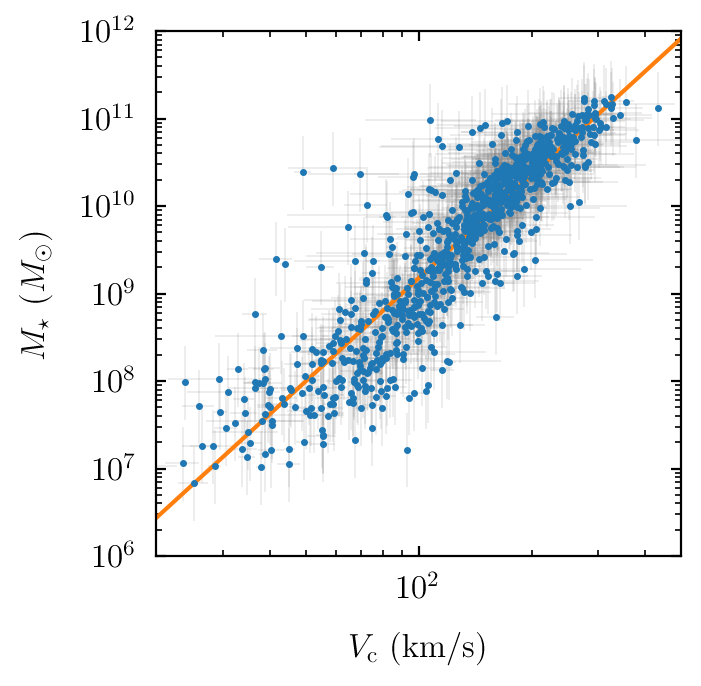

a = 3.65, b = 3.09


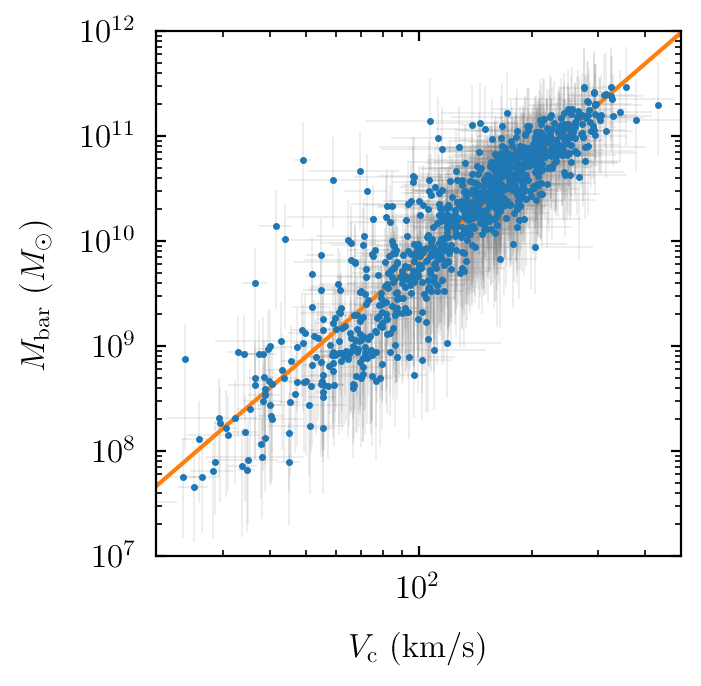

In [2]:
from astropy.io import fits
import scipy

def lineFit(log_sigma, a, b):
    return a + log_sigma * b

# Load data, correct baryonic mass for Helium
fn = cmn.data_dir + 'other_papers/bradford_2016_figure1.fits'
fits_file = fits.open(fn)
data = fits_file[1].data

M_bar = data['MBARYON'] + 0.1238
M_bar_err = data['MBARYON_ERR']
w20b = data['VW20I']
w20b_err = data['VW20I_ERR']
M_star = data['MSTAR']
M_star_err = data['MSTAR_ERR']

sig_min = 20.0
sig_max = 500.0
plt_x = np.linspace(np.log10(sig_min), np.log10(sig_max), 5)

# TFR
plt.figure(figsize = (3.5, 3.5))
plt.loglog()
plt.xlim(sig_min, sig_max)
plt.ylim(1E6, 1E12)
plt.xlabel(r'$V_{\rm c}\ \mathrm{(km/s)}$')
plt.ylabel(r'$M_{\rm \star}\ {(M_\odot)}$')

plt.errorbar(w20b, 10**M_star, xerr = w20b_err, 
             yerr = [10**(M_star - M_star_err), 10**(M_star + M_star_err)], 
             fmt = 'o', ms = 1.5, color = cmn.color_cycle[0], ecolor = 'gray', lw = 0.1)

params, _ = scipy.optimize.curve_fit(lineFit, np.log10(w20b), M_star, p0 = [1.0, 4.0], sigma = 10**M_star_err) 
plt_y = lineFit(plt_x, params[0], params[1])
print('a = %.2f, b = %.2f' % (params[0], params[1]))
plt.plot(10**plt_x, 10**plt_y, color = cmn.color_cycle[1])
plt.show()

# BTFR
plt.figure(figsize = (3.5, 3.5))
plt.loglog()
plt.xlim(sig_min, sig_max)
plt.ylim(1E7, 1E12)
plt.xlabel(r'$V_{\rm c}\ \mathrm{(km/s)}$')
plt.ylabel(r'$M_{\rm bar}\ {(M_\odot)}$')

plt.errorbar(w20b, 10**M_bar, xerr = w20b_err, 
             yerr = [10**(M_bar - M_bar_err), 10**(M_bar + M_bar_err)], 
             fmt = 'o', ms = 1.5, color = cmn.color_cycle[0], ecolor = 'gray', lw = 0.1)

params, _ = scipy.optimize.curve_fit(lineFit, np.log10(w20b), M_bar, p0 = [1.0, 4.0], sigma = 10**M_bar_err) 
plt_y = lineFit(plt_x, params[0], params[1])
print('a = %.2f, b = %.2f' % (params[0], params[1]))
plt.plot(10**plt_x, 10**plt_y, color = cmn.color_cycle[1])

# Fit from paper
#plt_y = 3.21 + 3.24 * plt_x
#plt.plot(10**plt_x, 10**plt_y, color = cmn.color_cycle[2])

plt.show()

Our slopes match the fits from the Bradford et al. paper very well. 

### 11.2) Elliptical galaxies

For elliptical galaxies, we have no rotation velocity and instead use the velocity dispersion. This quantity is measured by the SDSS pipeline via fitting the measured spectra with spectral templates that have been broadened with different velocity dispersions (see the [SDSS docs](https://www.sdss3.org/dr8/algorithms/redshifts.php) for more details). We use the UPenn sample to obtain a reliable separation into disks and ellitpicals.

In [3]:
from routines import obs_sdss
from routines import obs_utils

d_upenn = obs_sdss.loadUPennCatalog()

print('Found %d galaxies with the following fields:' % (len(d_upenn)))
for k in d_upenn.dtype.names:
    print(k)

Found 652773 galaxies with the following fields:
SexMag_r
SexMag_Err_r
SexHrad_r
SexSky_r
num_targets_r
num_neighborfit_r
AperRad_r
C_r
C_err_r
A_r
A_err_r
S_r
S_err_r
G_r
M20_r
extinction_r
dismod_r
kpc_per_arcsec_r
Vmax_r
SN_r
kcorr_r
SexMag_g
SexMag_Err_g
SexHrad_g
SexSky_g
num_targets_g
num_neighborfit_g
AperRad_g
C_g
C_err_g
A_g
A_err_g
S_g
S_err_g
G_g
M20_g
extinction_g
dismod_g
kpc_per_arcsec_g
Vmax_g
SN_g
kcorr_g
m_tot_r
m_aper_r
BT_r
r_tot_r
ba_tot_r
BT_aper_r
xctr_bulge_r
xctr_bulge_err_r
yctr_bulge_r
yctr_bulge_err_r
m_bulge_r
m_bulge_err_r
r_bulge_r
r_bulge_err_r
n_bulge_r
n_bulge_err_r
ba_bulge_r
ba_bulge_err_r
pa_bulge_r
pa_bulge_err_r
xctr_disk_r
xctr_disk_err_r
yctr_disk_r
yctr_disk_err_r
m_disk_r
m_disk_err_r
r_disk_r
r_disk_err_r
n_disk_r
n_disk_err_r
ba_disk_r
ba_disk_err_r
pa_disk_r
pa_disk_err_r
GalSky_r
GalSky_err_r
chi2nu_r
finalflag_r
autoflag_r
pyflag_r
pyfitflag_r
m_tot_g
m_aper_g
BT_g
r_tot_g
ba_tot_g
BT_aper_g
xctr_bulge_g
xctr_bulge_err_g
yctr_bulge_g
yctr_

As a reminder, let's plot a few examples of disk and elliptical samples. Here we do not care about the sub-distinctions between ellipticals and lenticulars or S a/b/c/d.

Elliptical (Ell and S0)
[Found 1564]


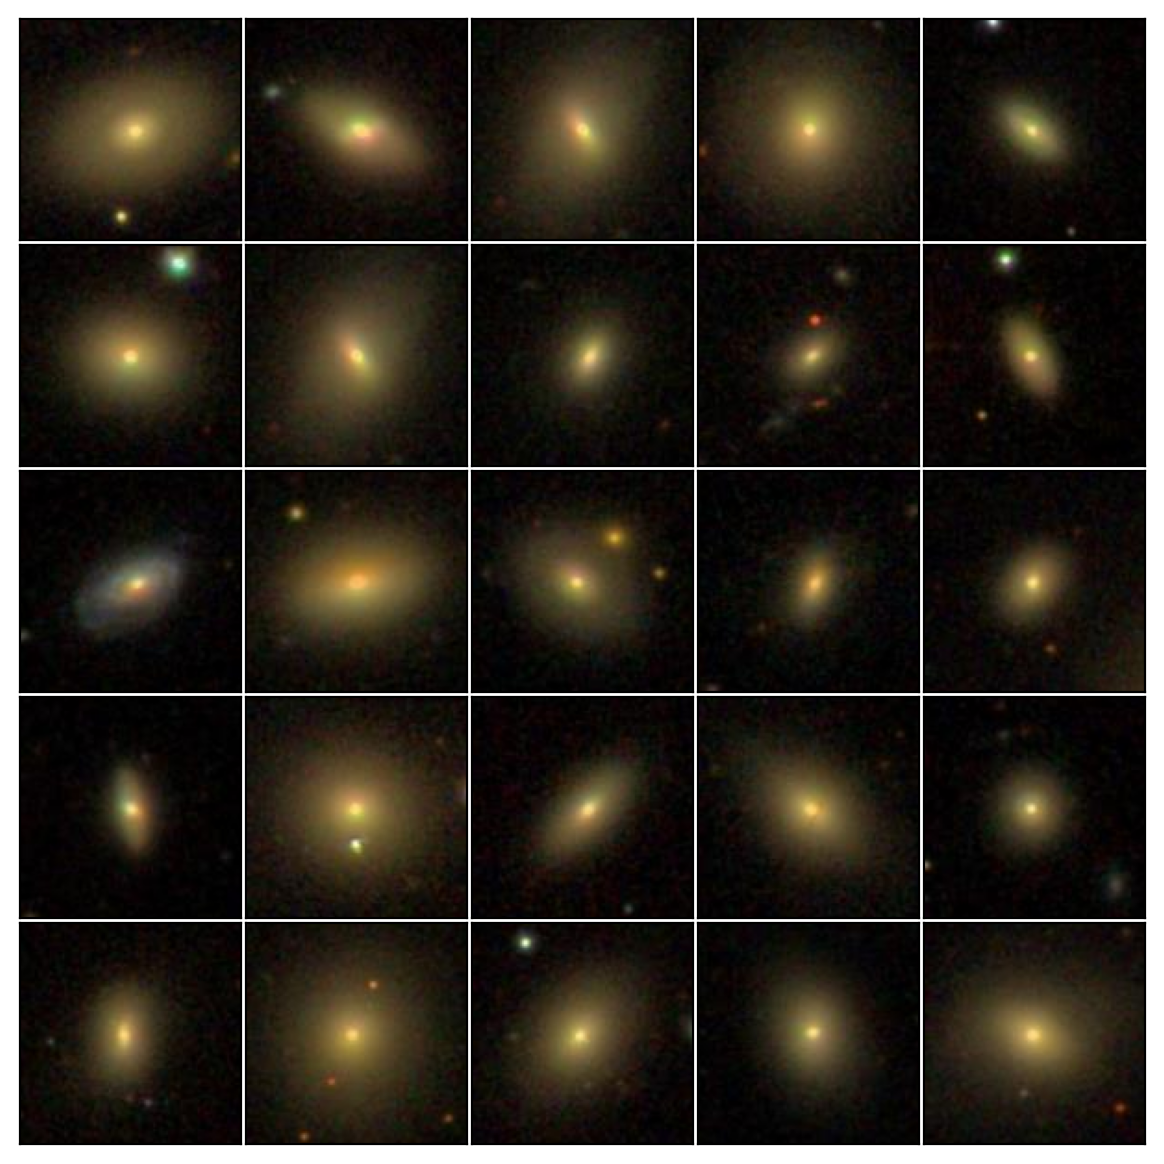

Spirals (Sab and Scd)
[Found 2827]


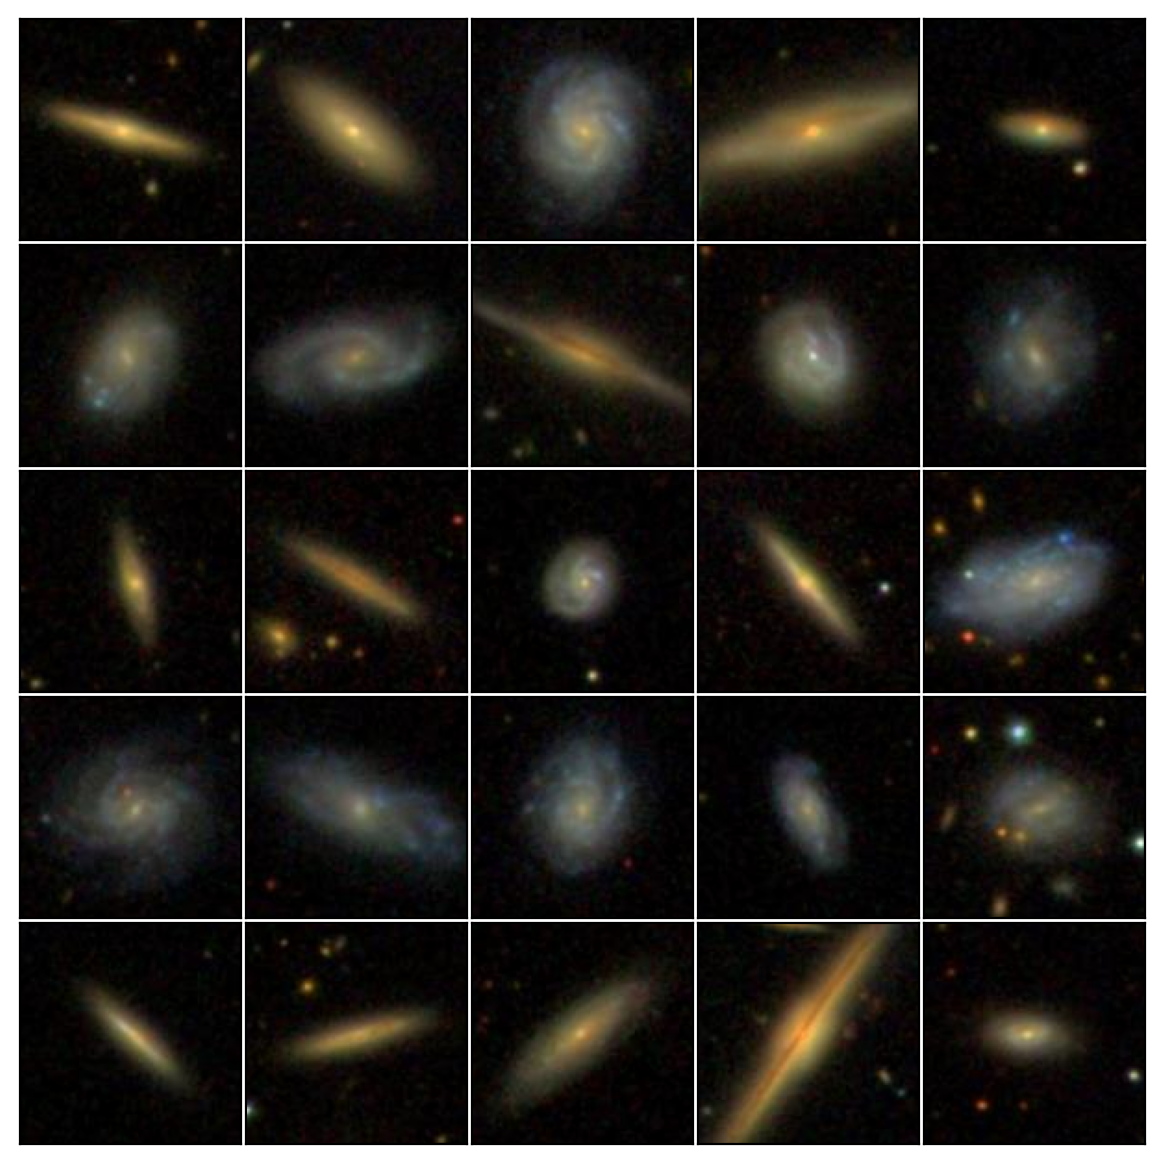

In [4]:
n_rows = 5
n_cols = 5
n_pix = 120
min_p = 0.7
np.random.seed(2025)

dL = cmn.cosmo.luminosityDistance(d_upenn['z']) / cmn.cosmo.h
mask = (dL >= 50.0) & (dL <= 150.0)
mask &= (d_upenn['m_tot_r'] < 16.0)

p_Ell = d_upenn['probaEll_h11']
p_S0 = d_upenn['probaS0_h11']
p_Sab = d_upenn['probaSab_h11']
p_Scd = d_upenn['probaScd_h11']

p_ell = np.maximum(p_Ell, p_S0)
p_dis = np.maximum(p_Sab, p_Scd)

mask_ell = (p_ell > min_p) & (p_ell > p_dis)
mask_dis = (p_dis > min_p) & (p_dis > p_ell)

for i in range(2):
    
    if i == 0:
        print('Elliptical (Ell and S0)')
        mask_morph = mask & mask_ell
    elif i == 1:
        print('Spirals (Sab and Scd)')
        mask_morph = mask & mask_dis
    
    if np.count_nonzero(mask_morph) == 0:
        continue
    print('[Found %d]' % np.count_nonzero(mask_morph))

    idxs_valid = np.where(mask_morph)[0]
    n_valid = len(idxs_valid)
    idxs = idxs_valid[np.random.randint(0, n_valid - 1, n_rows * n_cols)]
    d = d_upenn[idxs]

    obs_sdss.imageCollage(d, n_rows, n_cols, n_pix = n_pix, panel_size = 1.5);

#### The Faber-Jackson relation

We can now plot the luminosity-$\sigma$ relation known as the Faber-Jackson relation.

a = -0.50, b = 0.26


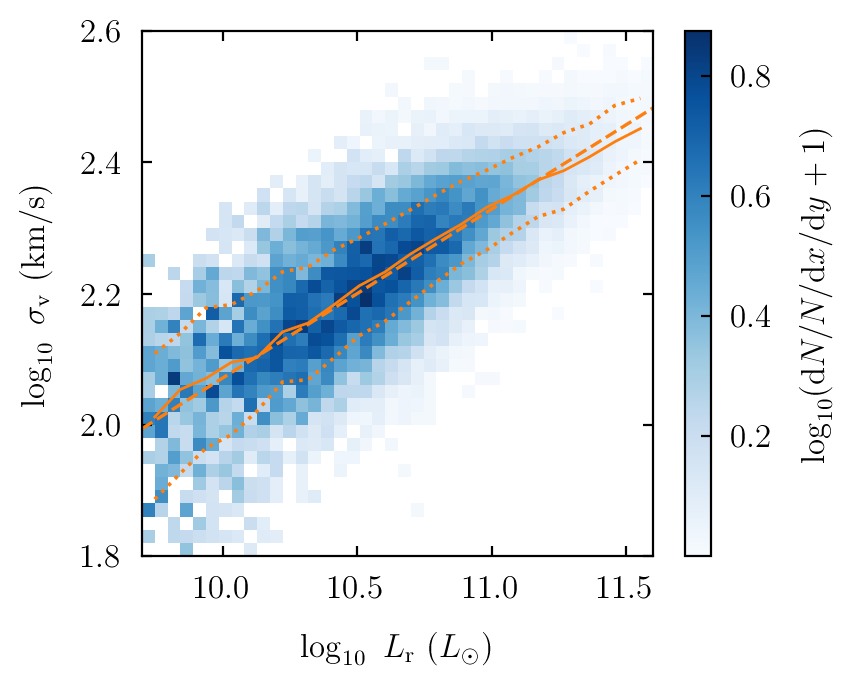

In [5]:
def percentile16(x):
    return np.percentile(x, 16.0)

def percentile84(x):
    return np.percentile(x, 84.0)

# Only ellipticals
mask1 = (d_upenn['m_tot_r'] < 16.0) & mask_ell
data_ell = d_upenn[mask1]

# Compute M and L
M_r = data_ell['m_tot_r'] - data_ell['extinction_r'] - data_ell['DM'] - data_ell['kcorr_r']
log_L = 0.4 * (obs_utils.solar_mag['r'] - M_r)
sigma_v = data_ell['veldisp']
mask2 = np.logical_not(np.isnan(log_L)) & (sigma_v > 0.0)

# Mask out nan values
x = log_L[mask2]
y = np.log10(sigma_v[mask2])
weights = data_ell['1/Vmax'][mask2]

x_lo = 9.7
x_hi = 11.6
y_lo = 1.8
y_hi = 2.6

plt_x = np.linspace(x_lo, x_hi, 5)
params, _ = scipy.optimize.curve_fit(lineFit, x, y, p0 = [1.0, 4.0], sigma = 1.0 / weights) 
plt_y = lineFit(plt_x, params[0], params[1])
print('a = %.2f, b = %.2f' % (params[0], params[1]))

cmap = plt.get_cmap('Blues')
cmap.set_under('#FFFFFF')


plt.figure(figsize = (4.5, 3.5))
plt.subplots_adjust(right = 0.91)
plt.xlabel(r'$\log_{10}\ L_{\rm r}\ (L_\odot)$')
plt.ylabel(r'$\log_{10}\ \sigma_{\rm v}\ ({\rm km} / {\rm s})$')
plt.xlim(x_lo, x_hi)
plt.ylim(y_lo, y_hi)

# Plot 2D histogram
hist, _, _ = np.histogram2d(x, y, bins = (40, 40), range = [[x_lo, x_hi], [y_lo, y_hi]], 
                            weights = weights, density = True)
hist = np.log10(hist.T[::-1] + 1.0)
plt.imshow(hist, extent = [x_lo, x_hi, y_lo, y_hi], interpolation = 'nearest', aspect = 'auto',
           cmap = cmap, vmin = 1E-3, vmax = np.max(hist))

# Plot fit
plt.plot(plt_x, plt_y, '--', lw = 1.2, color = cmn.color_cycle[1])

# Plot median and 1-sigma range
med_args = dict(range = (x_lo, x_hi), bins = 20)
med, bin_edges, _ = scipy.stats.binned_statistic(x, y, statistic = 'median', **med_args)
med_lo, bin_edges, _ = scipy.stats.binned_statistic(x, y, statistic = percentile16, **med_args)
med_hi, bin_edges, _ = scipy.stats.binned_statistic(x, y, statistic = percentile84, **med_args)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) * 0.5
plt.plot(bin_centers, med, ls = '-', lw = 1.0, color = cmn.color_cycle[1])
plt.plot(bin_centers, med_lo, ls = ':', lw = 1.3, color = cmn.color_cycle[1])
plt.plot(bin_centers, med_hi, ls = ':', lw = 1.3, color = cmn.color_cycle[1])

cbar = plt.colorbar()
cbar.set_label(r'$\log_{10} ({\rm d} N / N / {\rm d} x / {\rm d} y + 1)$')
plt.show()

#### The fundamental plane

For the following figure, the jupyter-matplotlib extension must be installed. With this extension, you should be able to rotate the plot in 3D.

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Set up constraint equations of the form  AB = 0, where B is a column vector of the plane 
# coefficients in the form b(1)*X + b(2)*Y +b(3)*Z + b(4) = 0. The solution is last column 
# of v. We then convert to x = ay + bz + c

def fitPlaneSVD(x, y, z):

    XYZ = np.stack((x, y, z)).T
    rows, cols = XYZ.shape
    p = (np.ones((rows, 1)))
    AB = np.hstack([XYZ, p])
    [u, d, v] = np.linalg.svd(AB, 0)        
    B = v[3, :]
    nn = np.linalg.norm(B[0:3])
    B = B / nn
    a = -B[1] / B[0]
    b = -B[2] / B[0]
    c = -B[3] / B[0]
    
    return a, b, c

plot_L = False

# Mask out very small galaxies, in addition to those with invalid values. 
# Limiting to sigma > 200 brings our fit much closer to the literature.
M_r = data_ell['m_tot_r'] - data_ell['extinction_r'] - data_ell['DM'] - data_ell['kcorr_r']
log_L = 0.4 * (obs_utils.solar_mag['r'] - M_r)
sigma_v = data_ell['veldisp']
R_eff_arcsec = data_ell['r_tot_r']
mask = np.logical_not(np.isnan(log_L)) & (sigma_v > 0.0) & (R_eff_arcsec >= 1.0) & (sigma_v >= 200.0)
R_eff_arcsec = R_eff_arcsec[mask]

# Compute surface brightness etc.
sb = data_ell['m_tot_r'][mask] + 2.5 * np.log10(2.0 * np.pi * R_eff_arcsec**2)
R_eff_kpc = R_eff_arcsec * data_ell['kpc_per_arcsec_r'][mask]
log_R = np.log10(R_eff_kpc)
log_sigma_v = np.log10(sigma_v[mask])
log_L = log_L[mask]

# Generalize
if plot_L:
    x = log_L
else:
    x = log_R
y = sb
z = log_sigma_v

x_min = np.min(x)
x_max = np.max(x)
y_min = np.min(y)
y_max = np.max(y)
z_min = np.min(z)
z_max = np.max(z)
    
# Least squares fit of the plane to the sample using singular value decomposition
a, b, c = fitPlaneSVD(x, y, z)
print('Found fundamental plan log10(Re) = a * mu + b * log10(sigma) + const')
print('Our fit:                 a = %.2f, b = %.2f' % (a, b))
print('Djorgovsky & Davis 1987: a = 0.36, b = 1.39')
print('Dressler et al. 1987:    a = 0.33, b = 1.33')

# Prepare figure
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection = '3d')
if plot_L:
    ax.set_xlabel(r'$\log_{10}\ L_{\rm r}\ (L_\odot)$')
else:
    ax.set_xlabel(r'$\log_{10}\ R_{\rm e}\ ({\rm kpc})$')
ax.set_ylabel(r'$\mu_{\rm eff}$')
ax.set_zlabel(r'$\log_{10}\ \sigma_{\rm v}\ ({\rm km} / {\rm s})$')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot subsample of points to make the plot rotate faster
idxs = np.random.randint(0, len(sb), 2000)
ax.scatter(x[idxs], y[idxs], z[idxs], c = cmn.color_cycle[0], marker = '.', s = 1.0)

# Plot plane
plane_x = np.linspace(x_min, x_max, 10)
plane_y = np.linspace(y_min, y_max, 10)
xx, yy = np.meshgrid(plane_x, plane_y)
zz = (xx - a * yy - c) / b
ax.plot_surface(xx, yy, zz, alpha = 0.2, color = cmn.color_cycle[1])

plt.show()

Found fundamental plan log10(Re) = a * mu + b * log10(sigma) + const
Our fit:                 a = 0.28, b = 1.37
Djorgovsky & Davis 1987: a = 0.36, b = 1.39
Dressler et al. 1987:    a = 0.33, b = 1.33


<IPython.core.display.Javascript object>

We see that the fundamental plane is remarkably thin when viewed edge-on.